In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import string
from string import punctuation
from nltk.stem.porter import PorterStemmer

In [2]:
df = pd.read_csv("SMSdata.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
df.info()
df.shape
df
df.duplicated().sum()
df= df.drop_duplicates(keep='first')
df.duplicated().sum()
df.shape
df['Label'] = df['Label'].replace('ham', 0, regex=True)
df['Label'] = df['Label'].replace('spam', 1, regex=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Msg     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


C:\Users\hp\AppData\Local\Temp\ipykernel_38328\2802559455.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace('spam', 1, regex=True)


In [4]:
df


,Label,Msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# Count of Ham Spam


<function matplotlib.pyplot.show(close=None, block=None)>

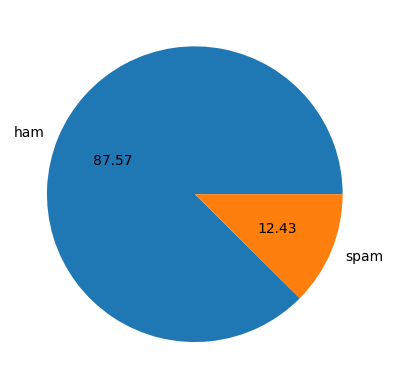

In [6]:
df['Label'].value_counts()
import matplotlib.pyplot as plt
plt.pie(df['Label'].value_counts(), labels= [ 'ham','spam'] , autopct="%0.2f")
plt.show

In [7]:
import nltk
!pip install nltk
nltk.download('punkt')



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# number of characters in the SMS

df['num_characters'] = df ['Msg'].apply(len)
df.head()

# number of words in the SMS

df['num_words'] = df['Msg'].apply(lambda x: len(nltk.word_tokenize(x)))

# number of sentences in the SMS

df['num_sentences'] = df['Msg'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()



,Label,Msg,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


# Text Preprocessing


In [9]:
# converts to lowercase
# converts to tokens - tokenizer
#removes special characters
#remove stop words and punctuation

In [10]:
def transform_Msg(Msg):
    Msg=Msg.lower()
    Msg = nltk.word_tokenize(Msg)

    y = []
    for i in Msg:
        if i.isalnum():
            y.append(i)

    Msg = y[:] 
    y.clear()

    for i in Msg:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return " ".join(y)


In [12]:
df['transformed_Msg'] = df['Msg'] .apply(transform_Msg)

In [13]:
df.head()

,Label,Msg,num_characters,num_words,num_sentences,transformed_Msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


# Model Build

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()

X = cv.fit_transform(df['transformed_Msg']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [15]:
y = df['Label'] .values
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [16]:
X_train , X_test , y_train , y_test = train_test_split ( X ,y , test_size= 0.2 , random_state=3 )
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5157, 8078)
(4125, 8078)
(1032, 8078)
(5157,)
(4125,)
(1032,)


In [17]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [18]:
model.fit(X_train ,y_train)

RandomForestClassifier()

In [19]:
prediction_traindata= model.predict(X_train)
accuracy_traindata = accuracy_score ( y_train , prediction_traindata)

In [20]:
print(accuracy_traindata)

1.0


In [21]:
prediction_testdata = model.predict(X_test)
accuracy_testdata = accuracy_score (y_test , prediction_testdata)
print ( accuracy_testdata)

0.9631782945736435


In [22]:
from sklearn.metrics import precision_score
precision_traindata = precision_score ( y_train , prediction_traindata)
print ( precision_traindata)

1.0


In [23]:
precision_testdata = precision_score ( y_test , prediction_testdata)
print ( precision_testdata)

1.0


In [24]:
from sklearn.metrics import recall_score
recall_traindata = recall_score( y_train , prediction_traindata)
print ( recall_traindata)

1.0


In [25]:
recall_testdata = recall_score ( y_test , prediction_testdata)
print ( recall_testdata)

0.7266187050359713


In [26]:
from sklearn.metrics import f1_score
f1_score_traindata = f1_score( y_train , prediction_traindata)
print ( f1_score_traindata)

1.0


In [27]:
f1_score_testdata = f1_score( y_test , prediction_testdata)
print ( f1_score_testdata)

0.8416666666666667


In [28]:
user_data = df['Msg'][10]
print(user_data)
user_data = transform_Msg(user_data)
user_data

I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.


'gon na home soon want talk stuff anymore tonight k cried enough today'

In [31]:
from sklearn.metrics import classification_report
print ( classification_report(y_train, prediction_traindata))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3623
           1       1.00      1.00      1.00       502

    accuracy                           1.00      4125
   macro avg       1.00      1.00      1.00      4125
weighted avg       1.00      1.00      1.00      4125

